In [1]:
import math
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

from models import BasicTransformer

## Data Preparation

In [3]:
x = torch.load('X.pt')
y = torch.load('y.pt')

# Create a set of all possible play descriptors
play_descriptors = set()
for s in x.flatten():
    play_descriptors.add(s)
for s in y.flatten():
    play_descriptors.add(s)

# Assign each play descriptor a unique token
play_to_tok = {s: i for i, s in enumerate(play_descriptors)}
num_token_types = len(play_descriptors)

tok_to_play = {play_to_tok[k]: k for k in play_to_tok}

# Convert x and y to their token representations
x_tok = torch.zeros(x.shape, dtype=torch.long)
y_tok = torch.zeros(y.shape, dtype=torch.long)

for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        x_tok[i, j] = play_to_tok[x[i, j]]

for i in range(y.shape[0]):
    for j in range(y.shape[1]):
        y_tok[i, j] = play_to_tok[y[i, j]]



In [4]:
def accuracy(preds, labels):
    return sum(preds[:, -1].argmax(dim=1) == labels[:, -1].argmax(dim=1)) / len(preds)

## Model Evaluation

In [21]:
model = BasicTransformer(num_token_types, ninp=128, nhead=128, nhid=2, nlayers=2, dropout=0.2)
model.load_state_dict(torch.load("weights.pt"))

<All keys matched successfully>

In [22]:
!pip install matplotsoccer

  Preparing metadata (setup.py) ... done
  Created wheel for matplotsoccer: filename=matplotsoccer-0.0.8-py3-none-any.whl size=5966 sha256=a97fdf547cd3c177f8ad508f8e57b9f30c66f130c86f636dc660f94bd8f33a16
  Stored in directory: /root/.cache/pip/wheels/ef/a9/d2/796b0ad28ffe440216ddaf7c9aa570dbdbfd67c3b208fd07ca
Successfully built matplotsoccer


In [29]:
import matplotsoccer as pltsoc

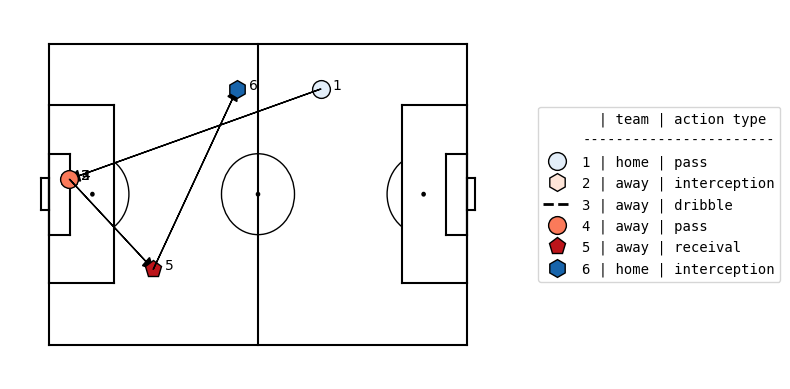

In [74]:
pred = True
pid = 200

loc = []
act = []
team = []

for i in range(x.shape[1]):
  splt = x[pid,i].split(',')

  if splt[0] == "True":
    team.append("home")
  else:
    team.append("away")

  act.append(splt[1])

  locx = (float(splt[2]) + 0.5) * 10.5
  locy = (float(splt[3]) + 0.5) * 6.8

  loc.append([locx,locy])

if not pred:
  splt = y[pid,-1].split(',')

  if splt[0] == "True":
    team.append("home")
  else:
    team.append("away")

  act.append(splt[1])

  locx = (float(splt[2]) + 0.5) * 10.5
  locy = (float(splt[3]) + 0.5) * 6.8

  loc.append([locx,locy])

else:
  model.eval()
  input = x_tok[pid:pid+1]
  output = model(input).argmax(dim=-1)
  play = tok_to_play[output[0,-1].item()]

  splt = play.split(',')

  if splt[0] == "True":
    team.append("home")
  else:
    team.append("away")

  act.append(splt[1])

  locx = (float(splt[2]) + 0.5) * 10.5
  locy = (float(splt[3]) + 0.5) * 6.8

  loc.append([locx,locy])


pltsoc.actions(loc,
               team=team,
               action_type=act,
               label=[[team[i],act[i]] for i in range(len(team))],
               labeltitle=["team","action type"])
